# Setting global seed

In [1]:
import os
import tensorflow as tf
import numpy as np
import random

# Set a seed value
seed_value = 25

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED'] = str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)



# Importing the libraries

In [2]:
# TODO: Import other necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


# Load the dataset

In [3]:
# TODO: Populate the create_image_generators() function
def create_image_generators(train_dir, target_size=(150, 150), batch_size=20, val_split=0.2):
    """
    Create training and validation generators for image data.

    Parameters:
    - base_dir: Path to the base directory where the 'train' folder is located.
    - target_size: Tuple of integers, the dimensions to which all images found will be resized.
    - batch_size: Integer, size of the batches of data.
    - val_split: Float, the fraction of images reserved for validation.

    Returns:
    - train_generator: Training data generator.
    - validation_generator: Validation data generator.
    """

    # TODO: Creating Image Data Generator for both training and validation
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=val_split
    )

    # TODO: Create a training data generator
    train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training',
        seed=seed_value
    )
    # TODO: Create a validation data generator
    validation_generator = datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation',
        seed=seed_value
    )
    return train_generator, validation_generator

train_dir = './train'
train_generator, validation_generator = create_image_generators(train_dir)

Found 148 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


In [4]:
def print_generator_info(generator):
    """
    Print information about a data generator.

    Parameters:
    - generator: The data generator (train or validation).
    """
    # Number of images
    num_images = generator.samples
    # Batch size
    batch_size = generator.batch_size
    # Class indices
    class_indices = generator.class_indices
    # Number of classes
    num_classes = generator.num_classes
    # Filenames
    filenames = generator.filenames

    print(f"Number of images: {num_images}")
    print(f"Batch size: {batch_size}")
    print(f"Class indices: {class_indices}")
    print(f"Number of classes: {num_classes}")
    print(f"Number of filenames loaded: {len(filenames)}")  # Number of filenames might be large

# Example usage:
print("Training Generator Info:")
print_generator_info(train_generator)
print("\nValidation Generator Info:")
print_generator_info(validation_generator)


Training Generator Info:
Number of images: 148
Batch size: 20
Class indices: {'not_polar': 0, 'polar': 1}
Number of classes: 2
Number of filenames loaded: 148

Validation Generator Info:
Number of images: 36
Batch size: 20
Class indices: {'not_polar': 0, 'polar': 1}
Number of classes: 2
Number of filenames loaded: 36


# Define the CNN model

In [34]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])# TODO: Define the CNN architecture

# Print the model summary
print(model.summary())

/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │    42,467,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,487,745 (162.08 MB)

 Trainable params: 42,487,745 (162.08 MB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
total_params = model.count_params()
print(f"Total number of parameters: {total_params}")

Total number of parameters: 42487745


# Compile and fit the CNN model

In [7]:
# TODO: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# TODO: Fit the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20


/opt/homebrew/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 0.6077 - loss: 4.0300 - val_accuracy: 0.8333 - val_loss: 0.5689
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.7616 - loss: 0.5800 - val_accuracy: 0.9167 - val_loss: 0.4153
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.8472 - loss: 0.4603 - val_accuracy: 0.8056 - val_loss: 0.3828
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.8407 - loss: 0.4005 - val_accuracy: 0.8889 - val_loss: 0.3033
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.7629 - loss: 0.5172 - val_accuracy: 0.7500 - val_loss: 0.4624
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.8270 - loss: 0.3866 - val_accuracy: 0.8889 - val_loss: 0.3158
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.8825 - loss: 0.2990 - val_accuracy: 0.9444 - val_loss: 0.2453
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.8677 - loss: 0.3151 - val_accuracy: 0.9444 - val_loss: 0.1617
Epo

# Plot Training and Validation accuracies

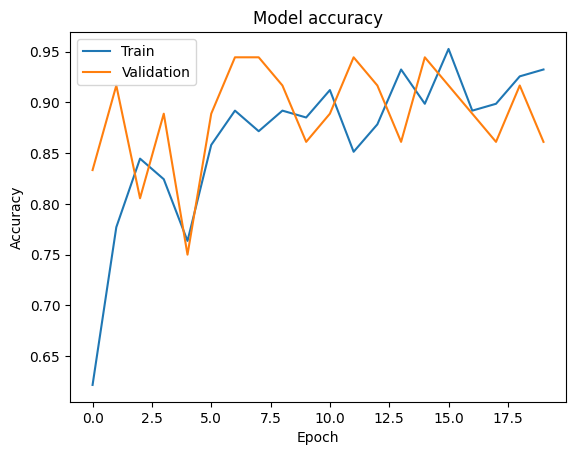

In [8]:
# TODO: Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot Training and Validation losses

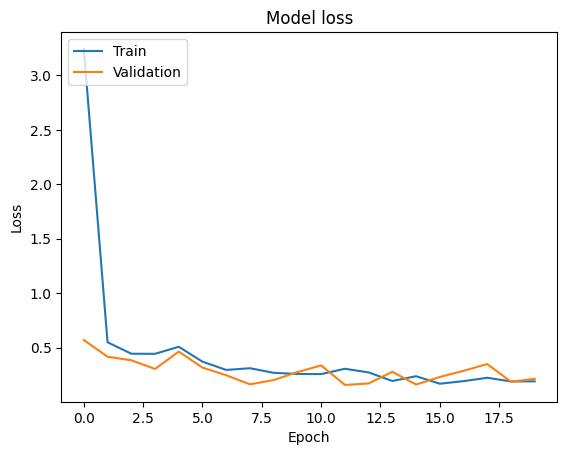

In [9]:
# TODO: Plot training & validation accuracy losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Testing


In [10]:
def load_display_predict_image(img_path, model, size=(150, 150)):
    """
    Load, preprocess, display, and predict the class of an image using a given model.

    Parameters:
    - img_path: String, path to the image file.
    - model: TensorFlow/Keras model that will be used to predict the image.
    - size: Tuple of integers, target size of the image (height, width).
    """
    # Load an image file to PIL format, target size can be adjusted
    # TODO
    img = image.load_img(img_path, target_size=size)
    # Convert the PIL image to a numpy array
    # TODO
    img_tensor = image.img_to_array(img)
    # Add a dimension to transform the array into a batch shape
    # TODO
    img_tensor = np.expand_dims(img_tensor, axis=0)
    # Normalize the image pixels to [0, 1]
    # TODO
    img_tensor /= 255.
    # Display the image
    # TODO
    plt.imshow(img_tensor[0])
    plt.show()
    # Predict using the provided model
    # TODO
    prediction = model.predict(img_tensor)
    print(prediction)
    print("Polar Bear" if prediction[0][0] > 0.5 else "Not Polar Bear")

## Inference for test_1.jpg

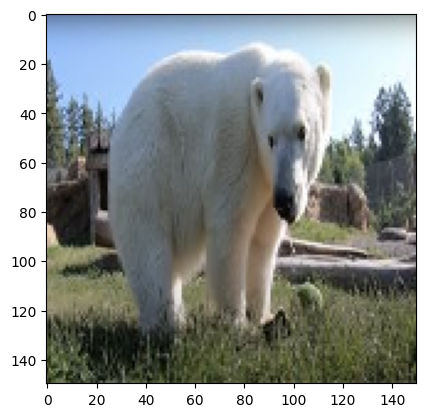

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.583148]]
Polar Bear


In [11]:
img_path = 'test/test_1.jpg'# TODO: set path to test_1.jpg
load_display_predict_image(img_path, model)

## Inference for test_2.jpg

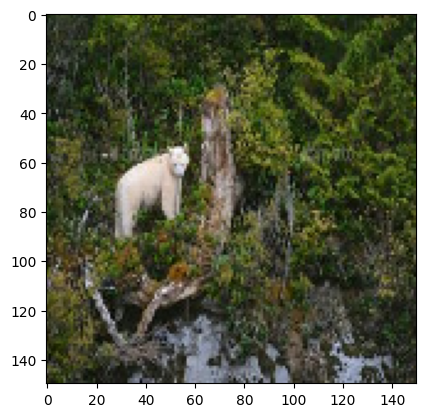

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[2.1169275e-05]]
Not Polar Bear


In [12]:
img_path = 'test/test_2.jpg'# TODO: set path to test_2.jpg
load_display_predict_image(img_path, model)

## Inference for test_3.jpg

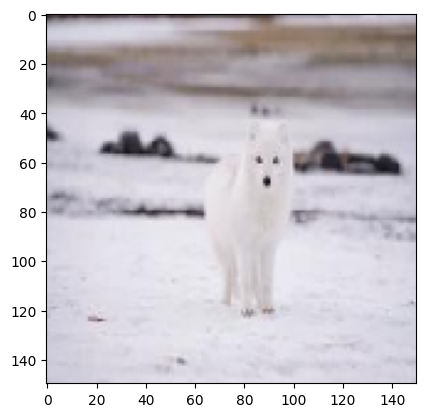

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[0.9877873]]
Polar Bear


In [13]:
img_path = 'test/test_3.jpg'# TODO: set path to test_3.jpg
load_display_predict_image(img_path, model)

## Inference for test_4.jpg

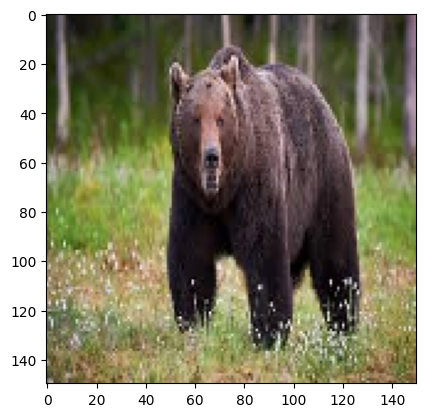

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[3.038277e-06]]
Not Polar Bear


In [14]:
img_path = 'test/test_4.jpg'# TODO: set path to test_4.jpg
load_display_predict_image(img_path, model)

## Inference for test_5.jpg

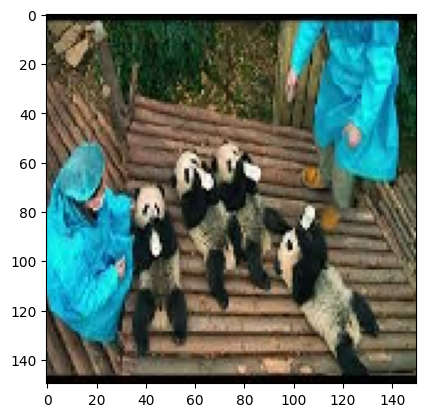

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[0.0035461]]
Not Polar Bear


In [15]:
img_path = 'test/test_5.jpg'# TODO: set path to test_5.jpg
load_display_predict_image(img_path, model)

## Inference for test_6.jpg

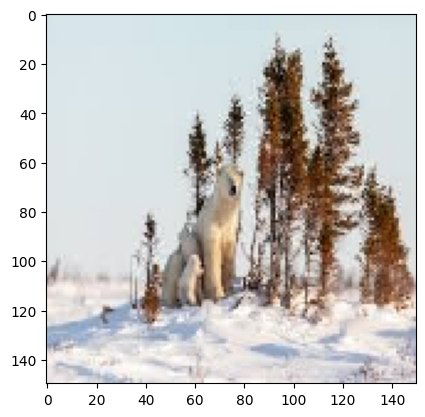

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[0.8971442]]
Polar Bear


In [16]:
img_path = 'test/test_6.jpg'# TODO: set path to test_6.jpg
load_display_predict_image(img_path, model)

# Visualize layer activations

In [21]:
# Load and preprocess an image
def load_image(img_path, size=(150,150)):
    img = image.load_img(img_path, target_size=size)
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    return img_tensor

# Define a function to display the activations
def display_layer_activations(activations, model):
    layer_names = [layer.name for layer in model.layers[:4]]
    images_per_row = 16

    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image = np.maximum(channel_image, 0) / max(channel_image.std(), 1e-5)
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()


In [38]:
# TODO: Define a function to create a model that returns output from each layer
def get_layer_outputs(model, img_tensor):
    print(model)
    # Extracts outputs for all layers up to the last MaxPooling layer (index 3)
    layer_outputs = [layer.output for layer in model.layers[:4]]
    # Creates a new model that will return these outputs, given the model input
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
    # Returns a list of numpy arrays, one array per layer activation
    activations = activation_model.predict(img_tensor)
    return activations


# Load and preprocess an image
img_path = 'test/test_4.jpg'
img_tensor = load_image(img_path, size=(150, 150))
# Get activations and display them
activations = get_layer_outputs(model, img_tensor)
display_layer_activations(activations, model)

ValueError: Sequential model 'sequential_5' has already been configured to use input shape (None, 150, 150, 3). You cannot build it with input_shape (150, 150, 3)